Fatemeh Mirzaei Kalani
400243075

In [ ]:
!pip install pytesseract

In [ ]:
!apt-get install -y tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (27.3 MB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123623 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-e

## Question1
for extracting the text from this image thses are the steps that I took:

1- Cropping the image to only process the text

2- Applying gaussian mask in frequency domain to reduce edges of text and get a more visible text.

3- resizing the image to get a better resolution

4- using pytesseract to read the text

Extracted Text: MH 20EE 7602



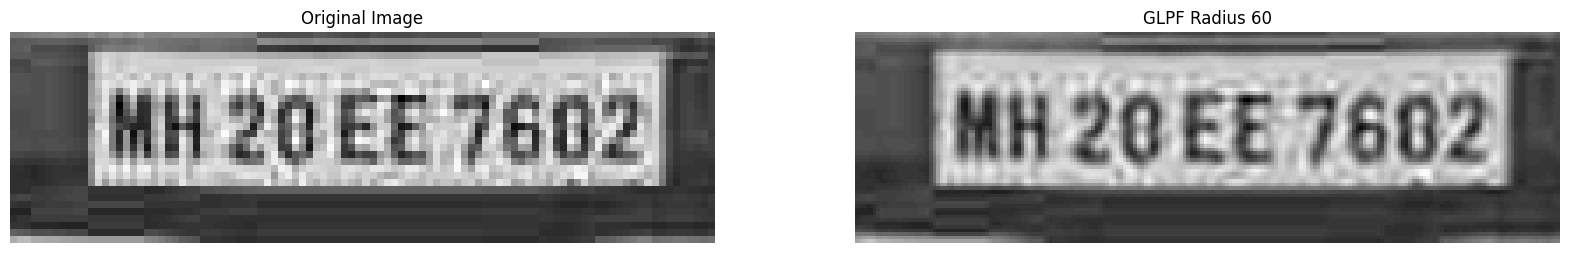

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift
from skimage import io, color
import cv2
import pytesseract

img = cv2.imread('car.jpg', cv2.IMREAD_GRAYSCALE)
#Crop image to get the text
height, width = img.shape[:2]

crop_height = 80
crop_width = 100

x = (width - crop_width) // 2
y = height - crop_height + 15

x = max(0, x)
y = max(0, y)

image = img[y:y+crop_height-50, x:x+crop_width]


# Convert to grayscale if the image is in color
if image.ndim == 3:  # Check if the image has multiple color channels (e.g., RGB)
    image = color.rgb2gray(image)  # Convert to grayscale if it's a color image

# Compute the Fourier Transform of the image
# Fourier Transform (fft2) is applied to convert the image to the frequency domain.
# fftshift is used to move the zero-frequency components to the center of the spectrum.
ft_image = fft2(image)  # Compute 2D Fourier Transform of the image
ft_image_shifted = fftshift(ft_image)  # Shift zero-frequency component to the center of the spectrum

# Create GLPF (Gaussian Lowpass Filters) for different radii
# GLPF will smooth the image by allowing only low frequencies (corresponding to smooth regions) to pass.
radii = 60  # cutoff radii for the Gaussian Lowpass Filters (GLPF)

# Get the dimensions of the image and calculate the center coordinates
rows, cols = image.shape  # Get the size of image
crow, ccol = rows // 2, cols // 2  # Calculate the center of the frequency domain (for creating filters)

# Create a Gaussian Lowpass Filter (GLPF) in the frequency domain
# The filter is centered at the origin (the center of the frequency domain), and D0 defines the cutoff radius
Y, X = np.ogrid[:rows, :cols]  # Create a grid for pixel coordinates
D = np.sqrt((X - ccol)**2 + (Y - crow)**2)  # Compute the distance from the center for each pixel
glpf_mask = np.exp(-(D**2) / (2 * (radii**2)))  # Gaussian function to create the lowpass filter
# Apply the GLPF mask to the Fourier-transformed image
# This effectively removes high-frequency components, resulting in a smoother image.
ft_image_filtered = ft_image_shifted * glpf_mask  # Apply the Gaussian mask in the frequency domain
# Perform the Inverse Fourier Transform to convert the image back to the spatial domain
filtered_image = np.abs(ifft2(ifftshift(ft_image_filtered)))  # Inverse FFT to return to spatial domain
filtered =cv2.convertScaleAbs(filtered_image)

resized_img = cv2.resize(filtered, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

plt.figure(figsize=(20,20))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_img, cmap='gray')
plt.title(f'GLPF Radius {radii}')
plt.axis('off')


# Run OCR
text = pytesseract.image_to_string(resized_img, config='--psm 6')
print("Extracted Text:", text)

## Question 2
Steps that I took to count the number of stars in the image:

1- reading the values of image from text and converting numpy array to a specific shape

2- Applying avg kernel with size 3 to the image to get a smoothed image

3- Applying a threashold to show the brightest stars

4- counting the stars using connectedComponentsWithStats in cv2

In [34]:
import numpy as np
import cv2
import re

with open('input1.txt', 'r') as file:
    data = file.read().splitlines()

height, width, channels = map(int, data[0].split())

pixels = []
for line in data[1:]:
    pixel_values = re.findall(r'\((\d+),\s*(\d+),\s*(\d+)\)', line)
    row = [tuple(map(int, pixel)) for pixel in pixel_values]
    pixels.extend(row)

#convert to NumPy array and reshape to the specified dimensions
img_array = np.array(pixels, dtype=np.uint8).reshape((height, width, channels))

array([[[101, 101, 101],
        [ 18,  18,  18],
        [ 52,  52,  52],
        ...,
        [ 64,  64,  64],
        [ 81,  81,  81],
        [ 50,  50,  50]],

       [[ 40,  40,  40],
        [ 94,  94,  94],
        [ 50,  50,  50],
        ...,
        [ 65,  65,  65],
        [ 40,  40,  40],
        [ 14,  14,  14]],

       [[129, 129, 130],
        [ 45,  45,  45],
        [ 81,  81,  81],
        ...,
        [ 47,  47,  47],
        [ 18,  18,  18],
        [113, 113, 113]],

       ...,

       [[  2,   2,   2],
        [ 89,  89,  89],
        [ 11,  11,  11],
        ...,
        [ 11,  11,  11],
        [  0,   0,   0],
        [ 18,  18,  18]],

       [[ 18,  18,  18],
        [ 35,  35,  35],
        [ 18,  18,  18],
        ...,
        [  0,   0,   0],
        [ 40,  40,  40],
        [ 96,  96,  96]],

       [[127, 127, 127],
        [106, 106, 106],
        [101, 101, 101],
        ...,
        [ 18,  18,  18],
        [ 43,  43,  43],
        [  9,   9,   9]]], dtype=uint8)
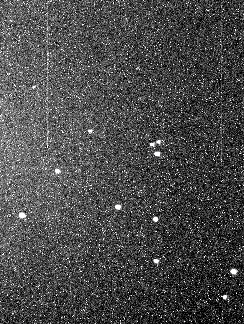

In [35]:
img_array

array([[[66, 66, 66],
        [60, 60, 60],
        [56, 56, 56],
        ...,
        [70, 70, 70],
        [48, 48, 48],
        [44, 44, 44]],

       [[65, 65, 65],
        [68, 68, 68],
        [63, 63, 63],
        ...,
        [53, 53, 53],
        [55, 55, 55],
        [51, 51, 51]],

       [[92, 92, 92],
        [89, 89, 89],
        [79, 79, 79],
        ...,
        [41, 41, 41],
        [52, 52, 52],
        [52, 52, 52]],

       ...,

       [[52, 52, 52],
        [42, 42, 42],
        [65, 65, 65],
        ...,
        [30, 30, 30],
        [29, 29, 29],
        [34, 34, 34]],

       [[67, 67, 67],
        [56, 56, 56],
        [61, 61, 61],
        ...,
        [37, 37, 37],
        [26, 26, 26],
        [32, 32, 32]],

       [[57, 57, 57],
        [53, 53, 53],
        [61, 61, 61],
        ...,
        [31, 31, 31],
        [38, 38, 38],
        [50, 50, 50]]], dtype=uint8)
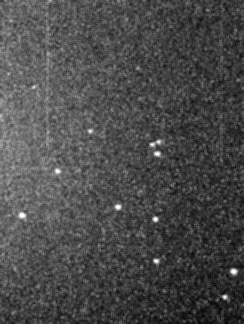

In [36]:
kernel_size = 3
average_kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size ** 2)
blurred_img = cv2.filter2D(img_array, -1, average_kernel)
blurred_img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
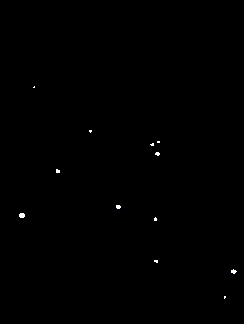

In [37]:
_, thresh_img = cv2.threshold(blurred_img, 200, 255, cv2.THRESH_BINARY)
thresh_img

In [38]:
gray_thresh_image = cv2.cvtColor(thresh_img, cv2.COLOR_BGR2GRAY)
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(gray_thresh_image)

num_stars = num_labels - 1
print("Number of bright stars:", num_stars)

for i in range(1, num_labels):
    x, y = centroids[i]
    print(f"Star {i}: (x={x:.2f}, y={y:.2f})")

Number of bright stars: 12
Star 1: (x=33.67, y=86.67)
Star 2: (x=90.00, y=130.71)
Star 3: (x=158.00, y=141.50)
Star 4: (x=151.89, y=144.11)
Star 5: (x=157.07, y=153.40)
Star 6: (x=57.36, y=170.71)
Star 7: (x=117.78, y=206.50)
Star 8: (x=21.50, y=215.00)
Star 9: (x=155.18, y=218.82)
Star 10: (x=155.70, y=260.80)
Star 11: (x=233.30, y=271.20)
Star 12: (x=224.40, y=296.80)


## Question 3

**A)** The Non-Local Means (NLM) filter is an advanced image denoising technique that compares each pixel in an image with neighboring pixels based on proximity and similarity in even far out pixels.
the NLM filter compares patches (small blocks of pixels) within an image. It determines if two patches look alike. if they are alike, the pixel values are averaged.

 In contrast to local filters (like Gaussian filters), which average only nearby pixels, the NLM filter considers a broader region.
 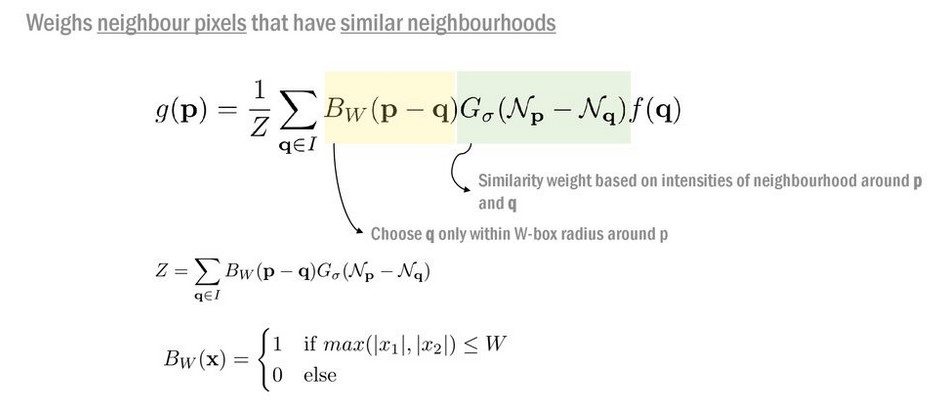

**Z** is a normalization factor to ensure the sum of weights is 1.

**BW(p-q)** determines if q falls within the neighborhood of p, defined by a window of size W. the length and width of the Box is 2W+1

The Gaussian function **Gσ(Np-Nq)** calculates the similarity between neighborhoods Np and Nq. Smaller differences lead to higher weights, so more similar neighborhoods contribute more to the average.

The NLM filter calculates the intensity at each pixel p by averaging the intensities **f(q)** of similar neighborhoods around it.

**B)** Neighborhood: Averaging Filter Considers only the local neighborhood around each pixel. For a pixel p, it calculates the average intensity of all pixels within a small window around p. NLM looks at a much larger area of the image.  it identifies patches of pixels that are similar to the patch centered around p, even if these patches are farther away.

Weighting: in Averaging Filter all pixels within the window have equal weight in the average, which results in blurring of edges and loss of details.
in NLM pixels are weighted based on how similar their surrounding patches are to the target pixel's patch. If a neighboring patch closely resembles the patch around p, it will have a higher weight. This results in better preservation of edges and detail.

Computational complexity: Averaging Filter is computationally simple and efficient, as it only calculates the average of a small and fixed window. On the other hand NLM has much more computational load because of comparing many patches together. So the Averaging filter is more suitable for real-time applications.

**C)** The NLM filter reduces noise without blurring important details. This is useful in applications requiring high fidelity, like medical imaging, satellite imagery, and artistic photography.

NLM is good at removing Gaussian noise and other types of random noise. By averaging similar neighborhoods.

The NLM is computationally intensive. it requires calculating similarity weights across large areas for each pixel. This can make it slow, especially for high-resolution images, making it less suitable for real-time applications.

the NLM filter can be quite memory-intensive, especially when applied to large images with high noise levels.

NLM is more complex to implement compared to simpler filters (mean or Gaussian filters).

**d)** [The essay](https://www.researchgate.net/publication/261712479_Implementation_of_Non_Local_Means_Filter_in_GPUs) describes a CUDA-based GPU implementation of the NLM filter for image denoising.
a version of condat's algorithm is implemented in CUDA. GPU kernel functions are invoked for image subtraction, convolution, addition of weighted pixels and division. On many GPU applications, memory access
can have a great impact on performance. Coalesced memory access is used to improve memory access time. Memory allocations are aligned using cudaMallocPitch() and cudaMemcpy2D() to ensure row addresses meet alignment requirements. the size of the replicated border was a multiple of 16 for
card with CUDA 1.1 and of 32 for cards with CUDA 2.0.

Also textures are used to accelerate uncoalesced memory reads due to their caching benefits.

In [1]:
!pip install pycuda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.5 MB/s eta 0:00:00
  Created wheel for pycuda: filename=pycuda-2024.1.2-cp310-cp310-linux_x86_64.whl size=660545 sha256=ccd4c30e937401b9497770a0b7326be6932fde66e661059ce62139549a60bea5
  Stored in directory: /root/.cache/pip/wheels/70/63/40/4bf006182f942d3516b71bb2ff3b57ccbdb8b2c0ee81882b6e
Successfully built pycuda


Steps that I took to compare computational time of NLM filter on CPU vs GPU:

1- using cv2.fastNlMeansDenoisingColore to compute NLM on CPU.

2- using pycuda to split image channels and give a gpu memory to each channel.

3- resizing an image and comparing the speed of cpu and gpu for each pixel size.


In [25]:
import time
import cv2
import numpy as np
import pycuda.driver as drv
import pycuda.tools
import pycuda.autoinit
from pycuda.compiler import SourceModule
import pycuda.gpuarray as gpuarray
import pycuda.cumath
from pycuda.elementwise import ElementwiseKernel
from pycuda.compiler import SourceModule
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim


cpu_times = []  #time taken by CPU (in seconds) for each size
gpu_times = []   #time taken by GPU (in seconds) for each size


In [26]:
mod = SourceModule("""
__global__ void NLM2_Colour(unsigned char *dest_r, unsigned char *dest_g, unsigned char *dest_b, unsigned char *img_r, unsigned char *img_g,
unsigned char *img_b, int imageW, int imageH, float Noise, float lerpC)
{

    #define NLM_WINDOW_RADIUS   3
    #define NLM_BLOCK_RADIUS    3

    #define NLM_WEIGHT_THRESHOLD    0.00039f
    #define NLM_LERP_THRESHOLD      0.10f

    __shared__ float fWeights[64];

    const float NLM_WINDOW_AREA = (2.0 * NLM_WINDOW_RADIUS + 1.0) * (2.0 * NLM_WINDOW_RADIUS + 1.0) ;
    const float INV_NLM_WINDOW_AREA = (1.0 / NLM_WINDOW_AREA);

    const long int   ix = blockDim.x * blockIdx.x + threadIdx.x;
    const long int   iy = blockDim.y * blockIdx.y + threadIdx.y;

    const float  x = (float)ix  + 1.0f;
    const float  y = (float)iy  + 1.0f;
    const float cx = blockDim.x * blockIdx.x + NLM_WINDOW_RADIUS + 1.0f;
    const float cy = blockDim.x * blockIdx.y + NLM_WINDOW_RADIUS + 1.0f;
    const float limxmin = NLM_BLOCK_RADIUS + 2;
    const float limxmax = imageW - NLM_BLOCK_RADIUS - 2;
    const float limymin = NLM_BLOCK_RADIUS + 2;
    const float limymax = imageH - NLM_BLOCK_RADIUS - 2;


    long int index4;
    long int index5;

    if(ix>limxmin && ix<limxmax && iy>limymin && iy<limymax){
        //Find color distance from current texel to the center of NLM window
        float weight = 0;

        for(float n = -NLM_BLOCK_RADIUS; n <= NLM_BLOCK_RADIUS; n++)
            for(float m = -NLM_BLOCK_RADIUS; m <= NLM_BLOCK_RADIUS; m++) {
                long int index1 = cx + m + (cy + n) * imageW;
                long int index2 = x + m + (y + n) * imageW;
                weight += ((img_r[index2] - img_r[index1]) * (img_r[index2] - img_r[index1])
                + (img_g[index2] - img_g[index1]) * (img_g[index2] - img_g[index1])
                + (img_b[index2] - img_b[index1]) * (img_b[index2] - img_b[index1])) / (256.0 * 256.0);
                }

        //Geometric distance from current texel to the center of NLM window
        float dist =
            (threadIdx.x - NLM_WINDOW_RADIUS) * (threadIdx.x - NLM_WINDOW_RADIUS) +
            (threadIdx.y - NLM_WINDOW_RADIUS) * (threadIdx.y - NLM_WINDOW_RADIUS);

        //Derive final weight from color and geometric distance
        weight = __expf(-(weight * Noise + dist * INV_NLM_WINDOW_AREA));

        //Write the result to shared memory
        fWeights[threadIdx.y * 8 + threadIdx.x] = weight / 256.0;
        //Wait until all the weights are ready
        __syncthreads();


        //Normalized counter for the NLM weight threshold
        float fCount = 0;
        //Total sum of pixel weights
        float sumWeights = 0;
        //Result accumulator
        float3 clr = {0.0, 0.0, 0.0};

        int idx = 0;

        //Cycle through NLM window, surrounding (x, y) texel

        for(float i = -NLM_WINDOW_RADIUS; i <= NLM_WINDOW_RADIUS + 1; i++)
            for(float j = -NLM_WINDOW_RADIUS; j <= NLM_WINDOW_RADIUS + 1; j++)
            {
                //Load precomputed weight
                float weightIJ = fWeights[idx++];

                //Accumulate (x + j, y + i) texel color with computed weight
                float3 clrIJ ; // Ligne code modifiée
                int index3 = x + j + (y + i) * imageW;
                clrIJ.x = img_r[index3];
                clrIJ.y = img_g[index3];
                clrIJ.z = img_b[index3];

                clr.x += clrIJ.x * weightIJ;
                clr.y += clrIJ.y * weightIJ;
                clr.z += clrIJ.z * weightIJ;

                //Sum of weights for color normalization to [0..1] range
                sumWeights  += weightIJ;

                //Update weight counter, if NLM weight for current window texel
                //exceeds the weight threshold
                fCount += (weightIJ > NLM_WEIGHT_THRESHOLD) ? INV_NLM_WINDOW_AREA : 0;
            }

        //Normalize result color by sum of weights
        sumWeights = 0.0039f / sumWeights;
        clr.x *= sumWeights;
        clr.y *= sumWeights;
        clr.z *= sumWeights;

        //Choose LERP quotent basing on how many texels
        //within the NLM window exceeded the weight threshold
        float lerpQ = (fCount > NLM_LERP_THRESHOLD) ? lerpC : 1.0f - lerpC;

        //Write final result to global memory
        float3 clr00 = {0.0, 0.0, 0.0};
        index4 = x + (y * imageW);
        index5 = imageW * (iy + 1) + ix + 1;

        clr00.x = img_r[index4] / 256.0;
        clr00.y = img_g[index4] / 256.0;
        clr00.z = img_b[index4] / 256.0;

        clr.x = clr.x + (clr00.x - clr.x) * lerpQ;
        clr.y = clr.y + (clr00.y - clr.y) * lerpQ;
        clr.z = clr.z + (clr00.z - clr.z) * lerpQ;


        dest_r[index5] = (int)(clr.x * 256.0);
        dest_g[index5] = (int)(clr.y * 256.0);
        dest_b[index5] = (int)(clr.z * 256.0);
    }
}
""")

In [27]:
def cpu_and_gpu_nlm(image_brut_CV, original_img):
  NLM2_Colour_GPU = mod.get_function("NLM2_Colour")

  height,width,layers = image_brut_CV.shape
  nb_pixels = height * width

  # Determination taille blocks et Grid
  nb_ThreadsX = 8
  nb_ThreadsY = 8
  nb_blocksX = (width // nb_ThreadsX) + 1
  nb_blocksY = (height // nb_ThreadsY) + 1

  # Set NLM parameters
  NLM_Noise = 1.45
  Noise = 1.0/(NLM_Noise*NLM_Noise)
  lerpC = 0.2

  # Algorithm CPU using OpenCV fastNlMeansDenoisingColored routine
  tps1 = time.time()
  param=21.0
  image_brut_CPU=cv2.fastNlMeansDenoisingColored(image_brut_CV, None, param, param, 3, 5) # application filtre denoise software colour
  tps_CPU = time.time() - tps1

  ssim_value, _ = ssim(original_img, image_brut_CPU, full=True, channel_axis=2, win_size=3)

  mse = np.mean((original_img - image_brut_CPU) ** 2)
  psnr_value = 10 * np.log10(255**2 / mse) if mse != 0 else float('inf')

  print(f"SSIM CPU: {ssim_value}")
  print(f"PSNR CPU: {psnr_value} dB")

  cpu_times.append(tps_CPU)

  # Algorithm GPU using PyCuda
  tps1 = time.time()

  b,g,r = cv2.split(image_brut_CV)
  b_gpu = drv.mem_alloc(b.size * b.dtype.itemsize)
  img_b_gpu = drv.mem_alloc(b.size * b.dtype.itemsize)
  drv.memcpy_htod(b_gpu, b)
  drv.memcpy_htod(img_b_gpu, b)
  res_b = np.empty_like(b)

  g_gpu = drv.mem_alloc(g.size * g.dtype.itemsize)
  drv.memcpy_htod(g_gpu, g)
  img_g_gpu = drv.mem_alloc(g.size * g.dtype.itemsize)
  drv.memcpy_htod(img_g_gpu, g)
  res_g = np.empty_like(g)

  r_gpu = drv.mem_alloc(r.size * r.dtype.itemsize)
  drv.memcpy_htod(r_gpu, r)
  img_r_gpu = drv.mem_alloc(r.size * r.dtype.itemsize)
  drv.memcpy_htod(img_r_gpu, r)
  res_r = np.empty_like(r)

  NLM2_Colour_GPU(r_gpu, g_gpu, b_gpu, img_r_gpu, img_g_gpu, img_b_gpu,np.intc(width),np.intc(height), np.float32(Noise), \
          np.float32(lerpC), block=(nb_ThreadsX,nb_ThreadsY,1), grid=(nb_blocksX,nb_blocksY))

  drv.memcpy_dtoh(res_r, r_gpu)
  drv.memcpy_dtoh(res_g, g_gpu)
  drv.memcpy_dtoh(res_b, b_gpu)
  r_gpu.free()
  g_gpu.free()
  b_gpu.free()
  img_r_gpu.free()
  img_g_gpu.free()
  img_b_gpu.free()

  image_brut_GPU=cv2.merge((res_r,res_g,res_b))

  tps_GPU = time.time() - tps1

  ssim_value, _ = ssim(original_img, image_brut_GPU, full=True, channel_axis=2, win_size=3)

  mse = np.mean((original_img - image_brut_GPU) ** 2)
  psnr_value = 10 * np.log10(255**2 / mse) if mse != 0 else float('inf')

  print(f"SSIM GPU: {ssim_value}")
  print(f"PSNR GPU: {psnr_value} dB")

  gpu_times.append(tps_GPU)
  image_brut_GPU=cv2.cvtColor(image_brut_GPU, cv2.COLOR_BGR2RGB)

  return image_brut_CPU, image_brut_GPU

/usr/local/lib/python3.10/dist-packages/google/colab/_variable_inspector.py:27: UserWarning: module in out-of-thread context could not be cleaned up
  globals().clear()


SSIM CPU: 0.8965237348104279
PSNR CPU: 34.91022453629514 dB
SSIM GPU: 0.7696205783813547
PSNR GPU: 28.924688899107256 dB
SSIM CPU: 0.9705439113839366
PSNR CPU: 40.4086626355237 dB
SSIM GPU: 0.8539421087626696
PSNR GPU: 29.222004159255906 dB
SSIM CPU: 0.9882338144357362
PSNR CPU: 45.90200710434957 dB
SSIM GPU: 0.8908006232111102
PSNR GPU: 29.411080358141525 dB
SSIM CPU: 0.9909715826482243
PSNR CPU: 47.84736648103543 dB
SSIM GPU: 0.8990882304818305
PSNR GPU: 29.467847195697388 dB


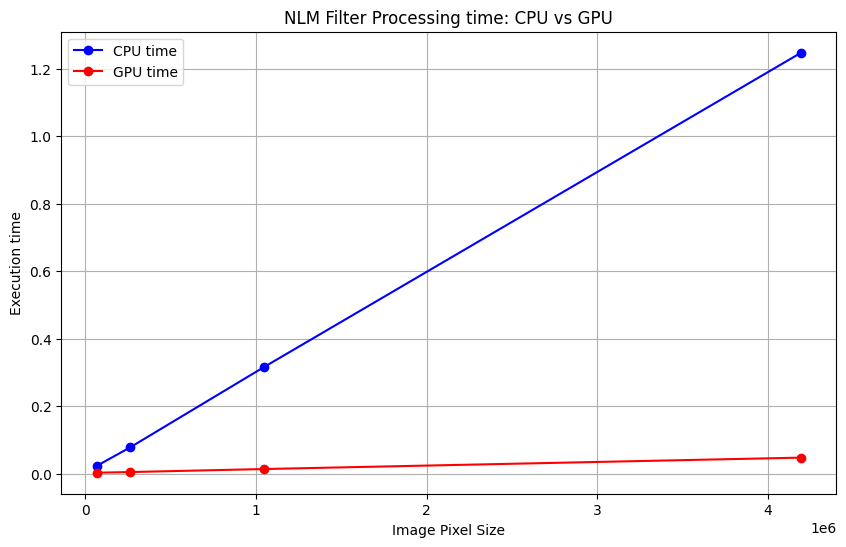

In [28]:
pixel_sizes = [256 , 512 , 1024, 2048]
image_brut_CV = cv2.imread("woman.jpg",cv2.IMREAD_COLOR)

for i, image_size in enumerate(pixel_sizes):
  image_brut_CV = cv2.resize(image_brut_CV, (image_size, image_size))
  cpu_and_gpu_nlm(image_brut_CV, image_brut_CV)
  pixel_sizes[i] = pixel_sizes[i] * pixel_sizes[i]

plt.figure(figsize=(10, 6))
plt.plot(pixel_sizes, cpu_times, label="CPU time", marker="o", color="blue")
plt.plot(pixel_sizes, gpu_times, label="GPU time", marker="o", color="red")

plt.xlabel("Image Pixel Size")
plt.ylabel("Execution time")
plt.title("NLM Filter Processing time: CPU vs GPU")
plt.legend()
plt.grid(True)

plt.show()

**SSIM:** In general, values closer to 1 indicate better quality and more similarity in structural content (like edges and textures) between the two images.

**PSNR:** 30 - 40 dB represents good quality with minor, often unnoticeable differences.

In this code, the quality of the images created with CPU are better than GPU.

In [29]:
def add_noise_and_denoise(img_name):
  img = cv2.imread(img_name,cv2.IMREAD_COLOR)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  mean = 0
  std_dev = 25
  gaussian_noise = np.random.normal(mean, std_dev, img.shape)  #generate noise
  noisy_image = img + gaussian_noise

  #clip values to keep them in the valid RGB range
  noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
  denoised_cpu, denoised_gpu = cpu_and_gpu_nlm(noisy_image, img)

  plt.figure(figsize=(10, 5))
  plt.subplot(1, 4, 1)
  plt.title("Original Image")
  plt.imshow(img)
  plt.axis("off")

  plt.subplot(1, 4, 2)
  plt.title("Noisy Image")
  plt.imshow(noisy_image)
  plt.axis("off")

  plt.subplot(1, 4, 3)
  plt.title("NLMed Image with cpu")
  plt.imshow(denoised_cpu)
  plt.axis("off")

  plt.subplot(1, 4, 4)
  plt.title("NLMed Image with gpu")
  plt.imshow(denoised_gpu)
  plt.axis("off")
  plt.show()

SSIM CPU: 0.7370647299643344
PSNR CPU: 30.797032877730924 dB
SSIM GPU: 0.5293673513361123
PSNR GPU: 28.394867413792614 dB


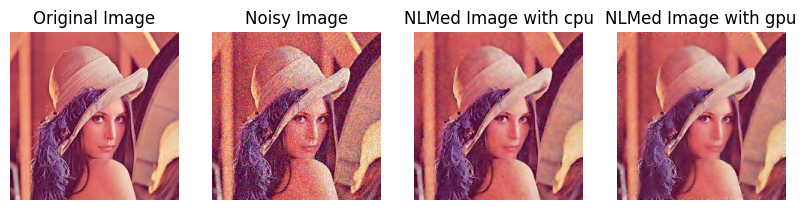

SSIM CPU: 0.5749465544859443
PSNR CPU: 30.357623348423385 dB
SSIM GPU: 0.4761332402171194
PSNR GPU: 29.548338953467418 dB


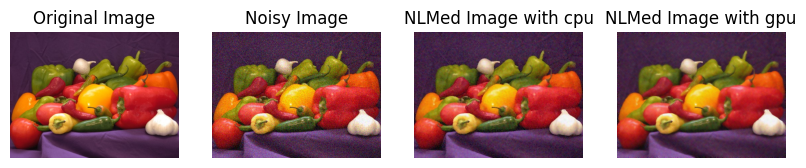

SSIM CPU: 0.7778840543400055
PSNR CPU: 32.040916377270975 dB
SSIM GPU: 0.49619859269812744
PSNR GPU: 28.595508807942917 dB


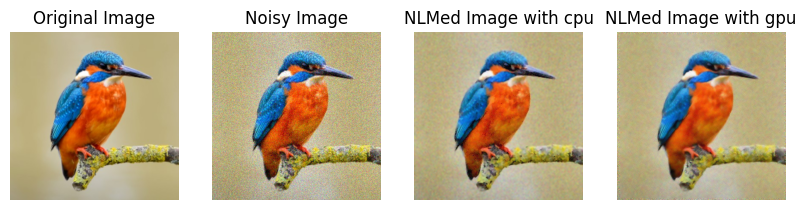

In [30]:
for img_name in ["woman.jpg", "vegetables.jpg", "bird.jpg"]:
  add_noise_and_denoise(img_name)